# 机器学习算法综合教程

**学习目标**:
1. 掌握回归算法（线性回归、岭回归）
2. 掌握分类算法（逻辑回归、决策树、随机森林、XGBoost）
3. 掌握聚类算法（K-means）
4. 学会模型评估与调参

**预计时间**: 40-45分钟

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print('✅ 库导入完成！')

✅ 库导入完成！


## 第一部分: 回归算法

### 1.1 线性回归

线性回归模型:
  权重w = 2.4197
  偏置b = 5.2858
  MSE = 2.6148
  R² = 0.9546


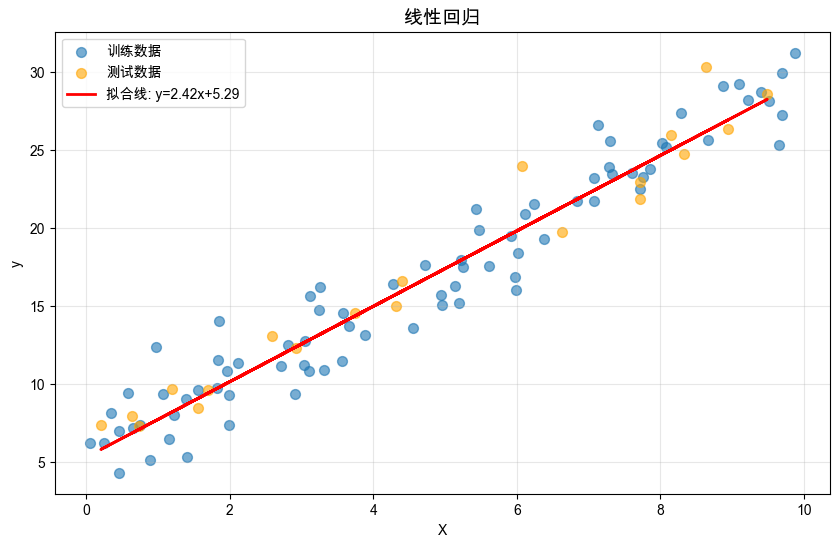

In [2]:
# 生成回归数据
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2.5 * X + 5 + np.random.randn(100, 1) * 2

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练线性回归模型
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# 评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'线性回归模型:')
print(f'  权重w = {lr.coef_[0][0]:.4f}')
print(f'  偏置b = {lr.intercept_[0]:.4f}')
print(f'  MSE = {mse:.4f}')
print(f'  R² = {r2:.4f}')

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.6, label='训练数据', s=50)
plt.scatter(X_test, y_test, alpha=0.6, label='测试数据', s=50, color='orange')
plt.plot(X_test, y_pred, 'r-', linewidth=2, label=f'拟合线: y={lr.coef_[0][0]:.2f}x+{lr.intercept_[0]:.2f}')
plt.title('线性回归', fontsize=14, fontweight='bold')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 1.2 多项式回归

线性回归 R² = 0.5559
多项式回归 R² = 0.8302


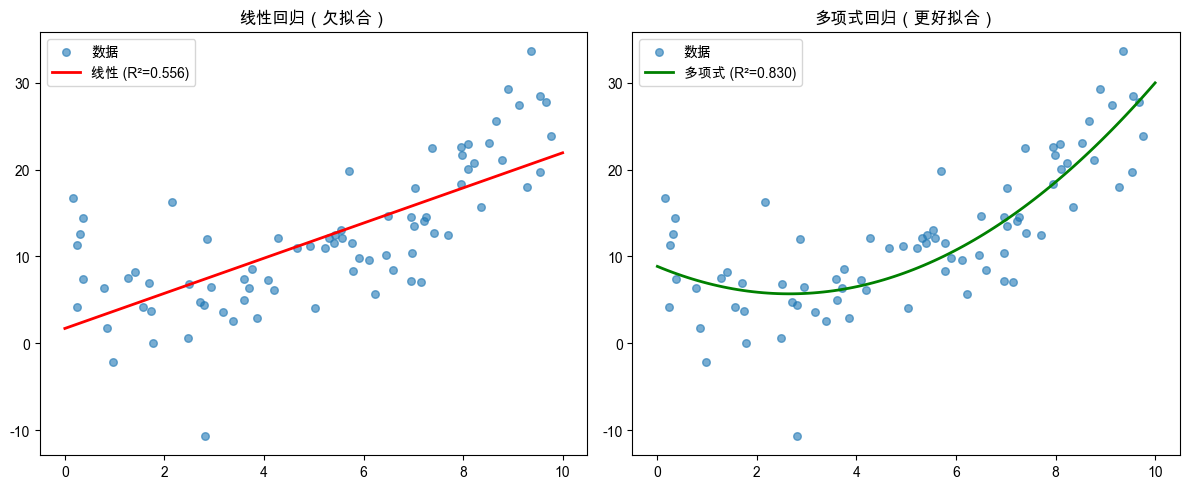

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 生成非线性数据
X_nonlinear = np.random.rand(100, 1) * 10
y_nonlinear = 0.5 * X_nonlinear**2 - 3 * X_nonlinear + 10 + np.random.randn(100, 1) * 5

# X y划分训练集和测试集 X_train_nl是非线性数据的训练集， y_train_nl是非线性数据的训练集标签
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(X_nonlinear, y_nonlinear, test_size=0.2, random_state=42)

# 线性回归（基线）
lr_linear = LinearRegression()
lr_linear.fit(X_train_nl, y_train_nl)  # 训练线性回归模型
y_pred_linear = lr_linear.predict(X_test_nl)  # 预测
r2_linear = r2_score(y_test_nl, y_pred_linear)  # 评估R²

# 多项式回归（degree=2）
poly = PolynomialFeatures(degree=2)  # degree 可以调整多项式的阶数
X_train_poly = poly.fit_transform(X_train_nl)  # 转换训练集
X_test_poly = poly.transform(X_test_nl)  # 转换测试集

lr_poly = LinearRegression()  # 多项式回归模型
lr_poly.fit(X_train_poly, y_train_nl)  # 训练多项式回归模型
y_pred_poly = lr_poly.predict(X_test_poly)  # 预测
r2_poly = r2_score(y_test_nl, y_pred_poly)  # 评估R²

print(f'线性回归 R² = {r2_linear:.4f}')
print(f'多项式回归 R² = {r2_poly:.4f}')

# 可视化
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot_linear = lr_linear.predict(X_plot)
y_plot_poly = lr_poly.predict(X_plot_poly)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_nl, y_train_nl, alpha=0.6, s=30, label='数据')
plt.plot(X_plot, y_plot_linear, 'r-', linewidth=2, label=f'线性 (R²={r2_linear:.3f})')
plt.title('线性回归（欠拟合）', fontsize=12, fontweight='bold')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_train_nl, y_train_nl, alpha=0.6, s=30, label='数据')
plt.plot(X_plot, y_plot_poly, 'g-', linewidth=2, label=f'多项式 (R²={r2_poly:.3f})')
plt.title('多项式回归（更好拟合）', fontsize=12, fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

## 第二部分: 分类算法

### 2.1 逻辑回归

逻辑回归准确率: 1.0000

分类报告:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        17
  Versicolor       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



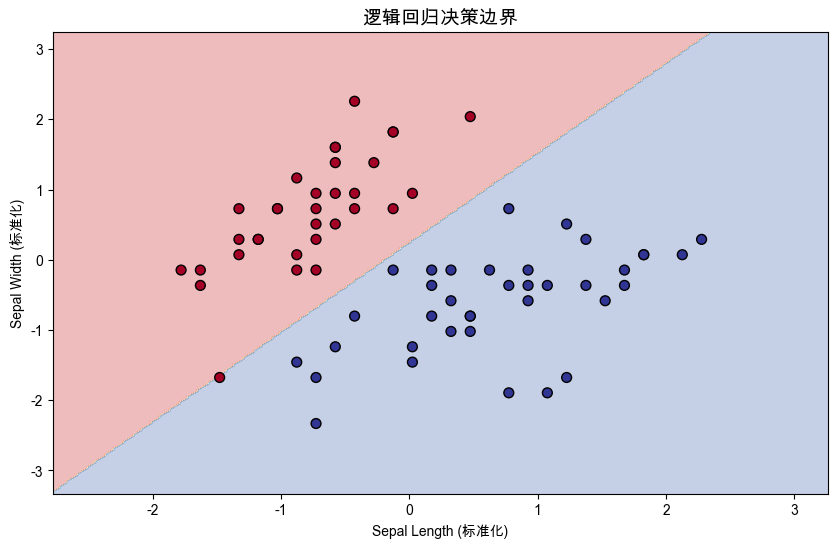

In [ ]:
# 加载鸢尾花数据集（二分类）
iris = sns.load_dataset('iris')
iris_binary = iris[iris['species'].isin(['setosa', 'versicolor'])].copy()
iris_binary['target'] = (iris_binary['species'] == 'versicolor').astype(int)  # 目标变量 setosa=0, versicolor=1

X = iris_binary[['sepal_length', 'sepal_width']].values  # 选择两个特征进行可视化 X 是特征矩阵
y = iris_binary['target'].values  # y 是目标变量

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 划分训练集和测试集

# 标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 标准化训练集
X_test_scaled = scaler.transform(X_test)  # 标准化测试集

# 逻辑回归
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train_scaled, y_train)  # 训练逻辑回归模型
y_pred = logistic.predict(X_test_scaled)  # 预测
y_pred_proba = logistic.predict_proba(X_test_scaled)[:, 1]  # 预测概率

accuracy = accuracy_score(y_test, y_pred)
print(f'逻辑回归准确率: {accuracy:.4f}')
print('\n分类报告:')
print(classification_report(y_test, y_pred, target_names=['Setosa', 'Versicolor']))

# 可视化决策边界
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = logistic.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='RdYlBu', edgecolor='black', s=50)
plt.title('逻辑回归决策边界', fontsize=14, fontweight='bold')
plt.xlabel('Sepal Length (标准化)')
plt.ylabel('Sepal Width (标准化)')
plt.show()

### 2.2 决策树

决策树准确率: 1.0000


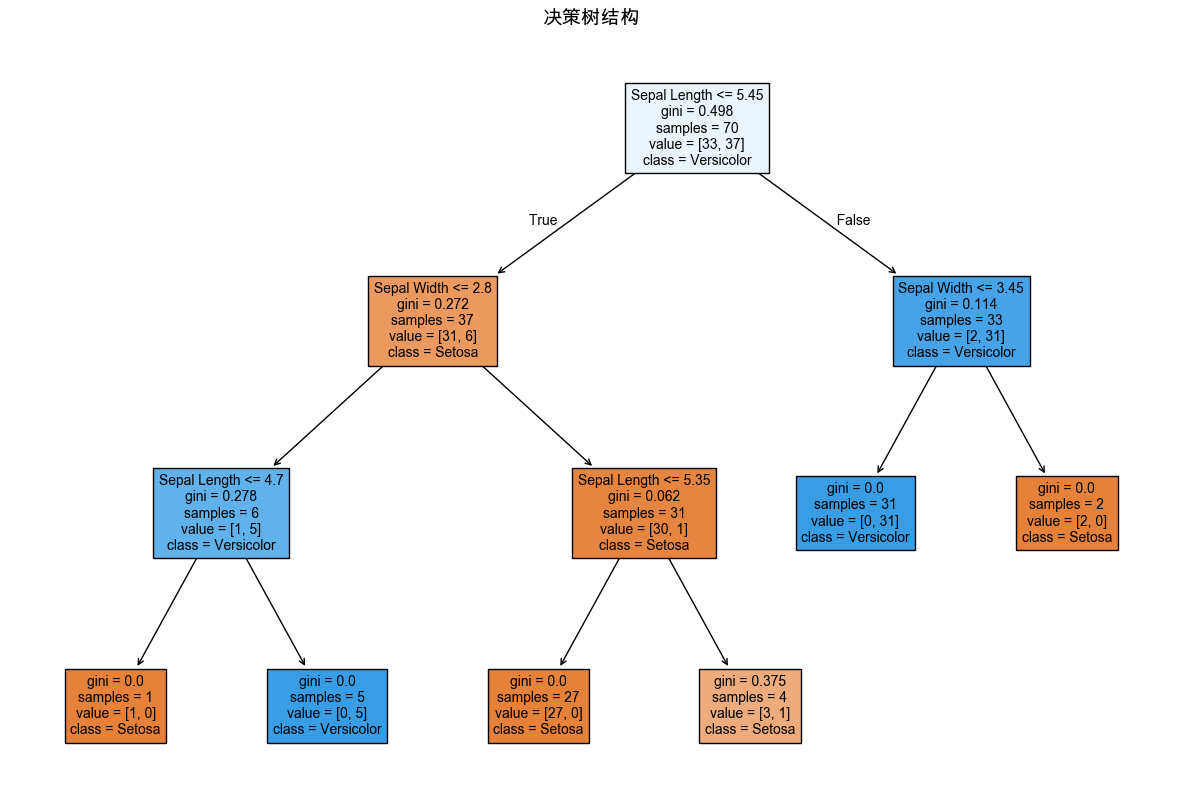


💡 决策树的可解释性:
  - 每个节点都是一个if-else规则
  - 可以直接看出决策逻辑
  - 适合业务人员理解


In [ ]:
# 决策树
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)  # 计算准确率
print(f'决策树准确率: {accuracy_tree:.4f}')

# 可视化决策树
plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, feature_names=['Sepal Length', 'Sepal Width'], 
          class_names=['Setosa', 'Versicolor'], fontsize=10)
plt.title('决策树结构', fontsize=14, fontweight='bold')
plt.show()

print('\n💡 决策树的可解释性:')
print('  - 每个节点都是一个if-else规则')
print('  - 可以直接看出决策逻辑')
print('  - 适合业务人员理解')

### 2.3 随机森林

随机森林准确率: 1.0000

特征重要性:
             特征       重要性
3   petal_width  0.436574
2  petal_length  0.417326
0  sepal_length  0.104614
1   sepal_width  0.041486


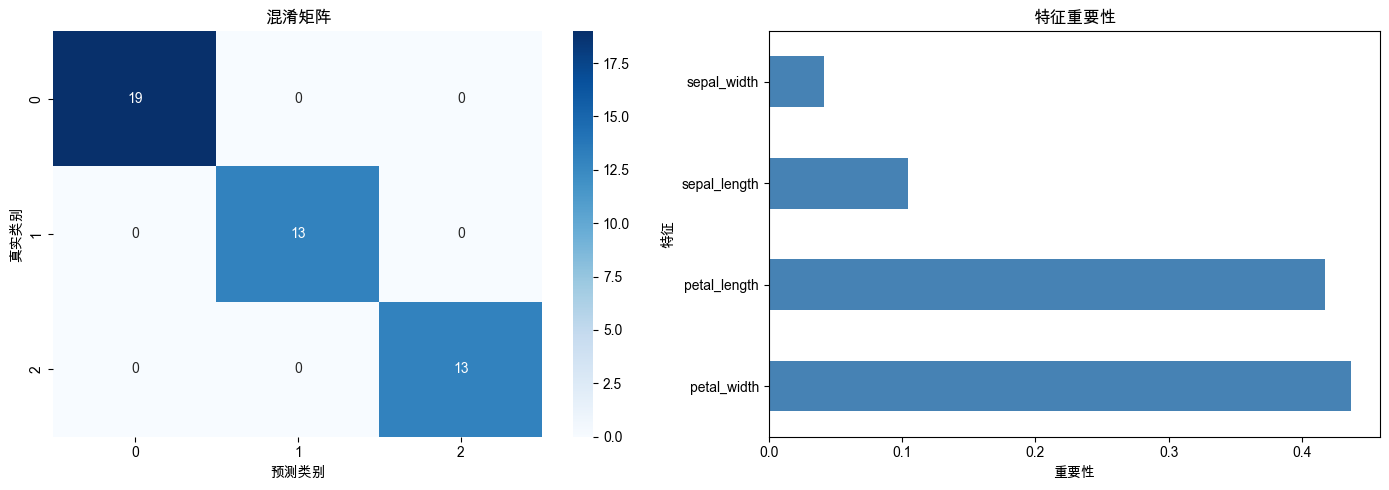

In [ ]:
# 使用完整鸢尾花数据集（三分类）
iris_full = sns.load_dataset('iris')  # 加载完整数据集
X_full = iris_full.drop('species', axis=1).values  # 特征矩阵 把除species列后的数据作为特征矩阵
y_full = iris_full['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2}).values  # 目标变量 映射类别为数字

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.3, random_state=42)  # 划分训练集和测试集

# 随机森林
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)  # 初始化随机森林分类器
rf.fit(X_train_full, y_train_full)  # 训练随机森林模型
y_pred_rf = rf.predict(X_test_full)  # 预测

accuracy_rf = accuracy_score(y_test_full, y_pred_rf)  # 计算准确率
print(f'随机森林准确率: {accuracy_rf:.4f}')

# 特征重要性
feature_importance = pd.DataFrame({
    '特征': iris_full.drop('species', axis=1).columns,
    '重要性': rf.feature_importances_
}).sort_values('重要性', ascending=False)

print('\n特征重要性:')
print(feature_importance)

# 可视化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 混淆矩阵
cm = confusion_matrix(y_test_full, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('混淆矩阵', fontsize=12, fontweight='bold')
axes[0].set_xlabel('预测类别')
axes[0].set_ylabel('真实类别')

# 特征重要性
feature_importance.plot(kind='barh', x='特征', y='重要性', ax=axes[1], legend=False, color='steelblue')
axes[1].set_title('特征重要性', fontsize=12, fontweight='bold')
axes[1].set_xlabel('重要性')

plt.tight_layout()
plt.show()

## 第三部分: 聚类算法

### 3.1 K-means

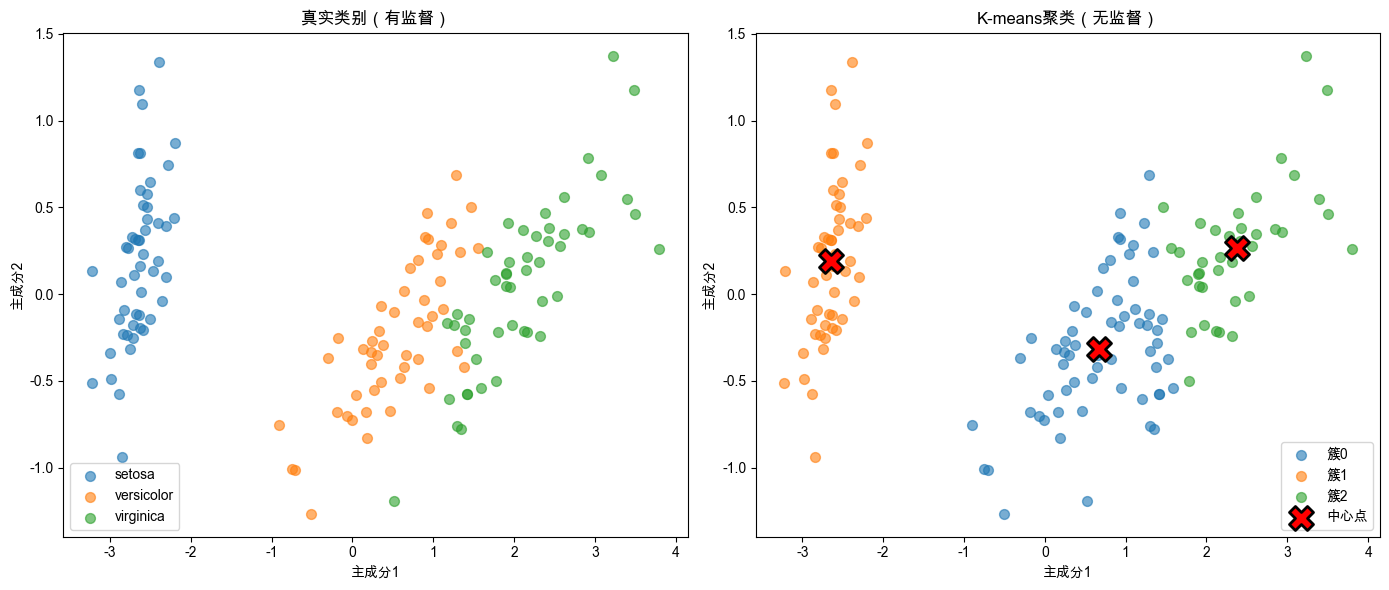

💡 K-means特点:
  - 无需标签（无监督学习）
  - 需要预先指定簇数K
  - 适用于球形簇


In [ ]:
# 使用鸢尾花数据（不使用标签）
X_cluster = iris_full[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

# K-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_cluster)  # 预测簇标签

# PCA降维到2D可视化
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

# 可视化
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 真实标签
for i, species in enumerate(['setosa', 'versicolor', 'virginica']):
    mask = y_full == i
    axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], label=species, alpha=0.6, s=50)
axes[0].set_title('真实类别（有监督）', fontsize=12, fontweight='bold')
axes[0].set_xlabel('主成分1')
axes[0].set_ylabel('主成分2')
axes[0].legend()

# K-means聚类
for i in range(3):
    mask = clusters == i
    axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'簇{i}', alpha=0.6, s=50)
centers_pca = pca.transform(kmeans.cluster_centers_)
axes[1].scatter(centers_pca[:, 0], centers_pca[:, 1], 
                marker='X', s=300, c='red', edgecolor='black', linewidth=2, label='中心点')
axes[1].set_title('K-means聚类（无监督）', fontsize=12, fontweight='bold')
axes[1].set_xlabel('主成分1')
axes[1].set_ylabel('主成分2')
axes[1].legend()

plt.tight_layout()
plt.show()

print('💡 K-means特点:')
print('  - 无需标签（无监督学习）')
print('  - 需要预先指定簇数K')
print('  - 适用于球形簇')

### 3.2 选择最佳K值（肘部法则）

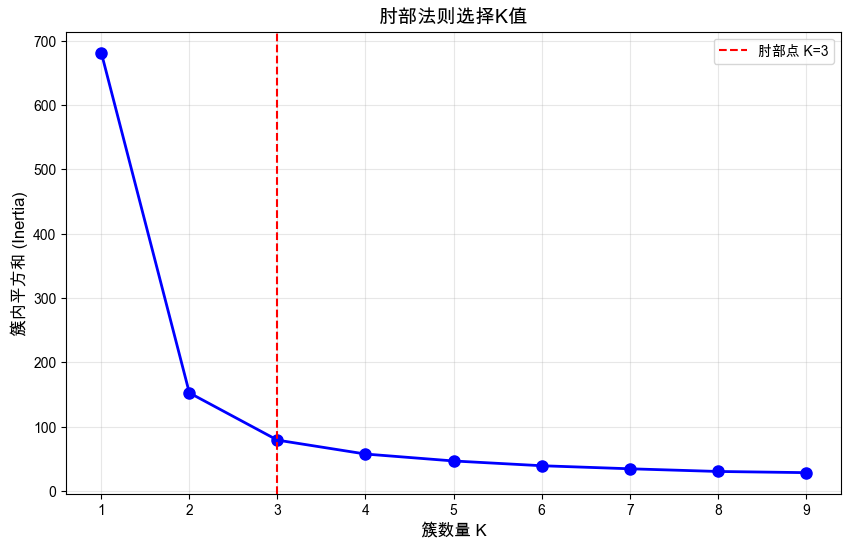

💡 肘部法则:
  - 选择曲线"肘部"对应的K值
  - 肘部之后增加K收益递减
  - 本例中K=3是最佳选择


In [ ]:
# 尝试不同的K值
inertias = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)

# 可视化肘部曲线
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('簇数量 K', fontsize=12)
plt.ylabel('簇内平方和 (Inertia)', fontsize=12)
plt.title('肘部法则选择K值', fontsize=14, fontweight='bold')
plt.axvline(3, color='red', linestyle='--', label='肘部点 K=3')  # K=3 代表最佳簇数量，最佳簇数量代表聚类效果的平衡点
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print('💡 肘部法则:')
print('  - 选择曲线"肘部"对应的K值')
print('  - 肘部之后增加K收益递减')
print('  - 本例中K=3是最佳选择')

## 第四部分: 模型评估与调参

### 4.1 交叉验证

In [10]:
# 5折交叉验证
scores = cross_val_score(rf, X_full, y_full, cv=5)

print('5折交叉验证结果:')
for i, score in enumerate(scores, 1):
    print(f'  Fold {i}: {score:.4f}')
print(f'\n平均准确率: {scores.mean():.4f} (±{scores.std():.4f})')

print('\n💡 交叉验证的好处:')
print('  - 更可靠的模型评估')
print('  - 充分利用数据')
print('  - 减少评估的随机性')

5折交叉验证结果:
  Fold 1: 0.9667
  Fold 2: 0.9667
  Fold 3: 0.9333
  Fold 4: 0.9667
  Fold 5: 1.0000

平均准确率: 0.9667 (±0.0211)

💡 交叉验证的好处:
  - 更可靠的模型评估
  - 充分利用数据
  - 减少评估的随机性


### 4.2 网格搜索调参

In [11]:
# 定义参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# 网格搜索
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_full, y_train_full)

print('网格搜索结果:')
print(f'最佳参数: {grid_search.best_params_}')
print(f'最佳准确率: {grid_search.best_score_:.4f}')

# 使用最佳模型预测
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_full)
test_accuracy = accuracy_score(y_test_full, y_pred_best)
print(f'\n测试集准确率: {test_accuracy:.4f}')

print('\n💡 网格搜索:')
print('  - 自动尝试所有参数组合')
print('  - 通过交叉验证评估每个组合')
print('  - 找到最佳超参数')

网格搜索结果:
最佳参数: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
最佳准确率: 0.9429

测试集准确率: 1.0000

💡 网格搜索:
  - 自动尝试所有参数组合
  - 通过交叉验证评估每个组合
  - 找到最佳超参数


## 🎯 综合练习: 端到端机器学习项目

In [ ]:
# 生成信用卡欺诈检测数据（不平衡数据）
from sklearn.datasets import make_classification

# make_classification 生成一个二分类数据集，包含1000个样本，20个特征，其中15个是信息性特征，5个是冗余特征。类别0占90%，类别1占10%，模拟信用卡欺诈检测中的不平衡情况。
X_fraud, y_fraud = make_classification(n_samples=1000, n_features=20, n_informative=15,
                                      n_redundant=5, n_classes=2, weights=[0.9, 0.1],
                                      random_state=42)

print(f'数据形状: {X_fraud.shape}')
print(f'正常交易: {(y_fraud==0).sum()} ({(y_fraud==0).sum()/len(y_fraud)*100:.1f}%)')
print(f'欺诈交易: {(y_fraud==1).sum()} ({(y_fraud==1).sum()/len(y_fraud)*100:.1f}%)')
print('\n⚠️ 注意: 数据不平衡，准确率不是好指标！')

数据形状: (1000, 20)
正常交易: 898 (89.8%)
欺诈交易: 102 (10.2%)

⚠️ 注意: 数据不平衡，准确率不是好指标！


In [ ]:
# 划分数据集
# 使用分层抽样确保训练集和测试集中类别比例一致, stratify参数实现分层抽样
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(
    X_fraud, y_fraud, test_size=0.3, random_state=42, stratify=y_fraud)

# 标准化
scaler_fraud = StandardScaler()
X_train_fraud_scaled = scaler_fraud.fit_transform(X_train_fraud)
X_test_fraud_scaled = scaler_fraud.transform(X_test_fraud)

# 训练模型-随机森林 
# 使用class_weight='balanced'处理类别不平衡, 自动调整权重以平衡类别, n_estimators=100表示使用100棵树
rf_fraud = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf_fraud.fit(X_train_fraud_scaled, y_train_fraud)

# 预测
y_pred_fraud = rf_fraud.predict(X_test_fraud_scaled)
y_pred_fraud_proba = rf_fraud.predict_proba(X_test_fraud_scaled)[:, 1]

# 评估
print('分类报告:')
print(classification_report(y_test_fraud, y_pred_fraud, target_names=['正常', '欺诈']))

# AUC 是衡量二分类模型性能的重要指标，尤其适用于不平衡数据集。AUC值介于0.5（随机猜测）和1.0（完美分类）之间，值越高表示模型性能越好。
print(f'\nAUC: {roc_auc_score(y_test_fraud, y_pred_fraud_proba):.4f}')

分类报告:
              precision    recall  f1-score   support

          正常       0.91      1.00      0.95       269
          欺诈       0.75      0.10      0.17        31

    accuracy                           0.90       300
   macro avg       0.83      0.55      0.56       300
weighted avg       0.89      0.90      0.87       300


AUC: 0.8924


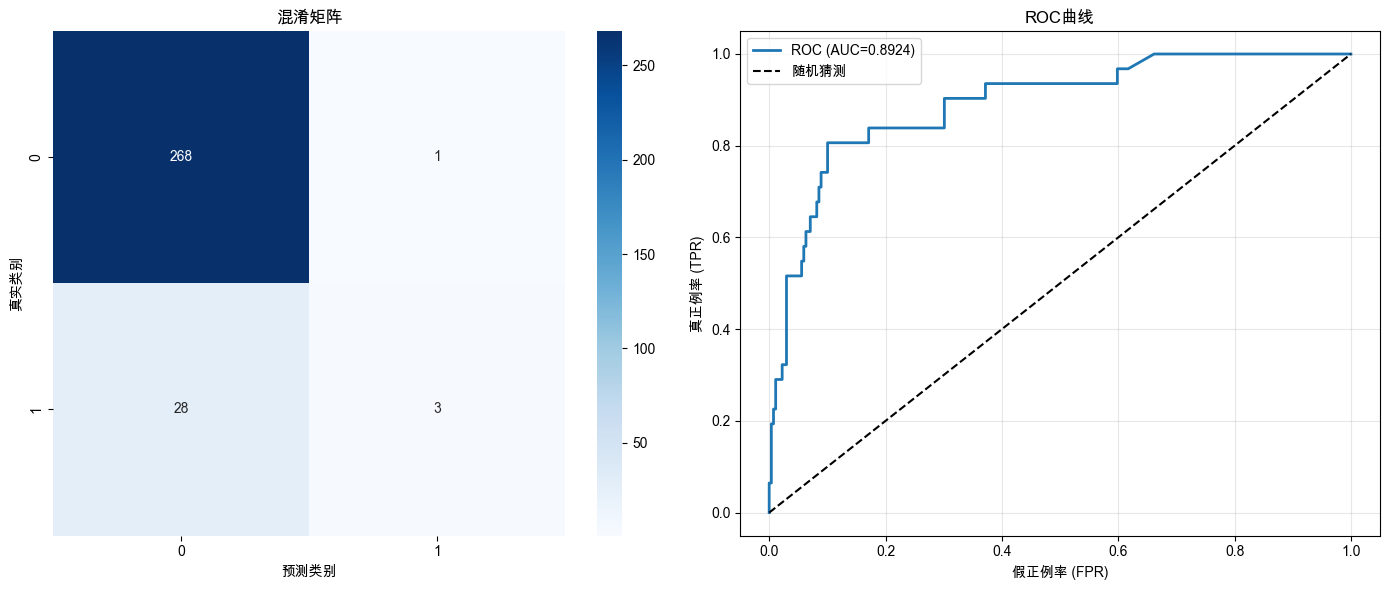


💡 不平衡数据处理:
  - 使用class_weight="balanced"
  - 关注精确率、召回率、F1
  - 使用AUC评估模型
  - 可以使用SMOTE过采样


In [14]:
# 可视化结果
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 混淆矩阵
cm_fraud = confusion_matrix(y_test_fraud, y_pred_fraud)
sns.heatmap(cm_fraud, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('混淆矩阵', fontsize=12, fontweight='bold')
axes[0].set_xlabel('预测类别')
axes[0].set_ylabel('真实类别')

# ROC曲线
fpr, tpr, thresholds = roc_curve(y_test_fraud, y_pred_fraud_proba)
auc = roc_auc_score(y_test_fraud, y_pred_fraud_proba)

axes[1].plot(fpr, tpr, linewidth=2, label=f'ROC (AUC={auc:.4f})')
axes[1].plot([0, 1], [0, 1], 'k--', label='随机猜测')
axes[1].set_title('ROC曲线', fontsize=12, fontweight='bold')
axes[1].set_xlabel('假正例率 (FPR)')
axes[1].set_ylabel('真正例率 (TPR)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('\n💡 不平衡数据处理:')
print('  - 使用class_weight="balanced"')
print('  - 关注精确率、召回率、F1')
print('  - 使用AUC评估模型')
print('  - 可以使用SMOTE过采样')

## 🎯 总结

### 核心知识点

1. **回归算法**:
   - 线性回归: 简单、可解释
   - 岭回归: 加L2正则化，防止过拟合
   - 多项式回归: 处理非线性关系

2. **分类算法**:
   - 逻辑回归: 线性分类器
   - 决策树: 可解释性强
   - 随机森林: 准确率高、抗过拟合

3. **聚类算法**:
   - K-means: 简单、高效
   - 肘部法则选择K值

4. **模型评估**:
   - 回归: MSE, RMSE, R²
   - 分类: 准确率、精确率、召回率、F1、AUC
   - 交叉验证: 更可靠的评估
   - 网格搜索: 自动调参

### 算法选择指南

| 问题类型 | 推荐算法 | 备注 |
|---------|---------|------|
| 线性回归 | LinearRegression | 数据线性相关 |
| 非线性回归 | 多项式回归、决策树 | 需要正则化 |
| 二分类 | LogisticRegression、RandomForest | 数据平衡 |
| 多分类 | RandomForest、XGBoost | 数据充足 |
| 不平衡分类 | RandomForest+class_weight | 关注AUC |
| 聚类 | K-means | 球形簇 |
| 高维数据 | PCA降维+算法 | 提高效率 |

### 下一步

- ✅ 完成练习
- 📚 开始 [Stage 3项目实战](../../docs/stage3/projects/)
- 🚀 学习深度学习

**恭喜完成机器学习算法教程！** 🎉

"实践是检验算法的唯一标准" - 多做项目，多参加竞赛！